<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_vs_Flu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

Data downloaded from [CDC's Fluview](https://gis.cdc.gov/grasp/fluview/mortality.html) which uses data from the National Center for Health Statistics Mortality Surveillance System.

In [0]:
data_raw = pd.read_csv('https://raw.githubusercontent.com/alonsosilvaallende/COVID-19/master/data/National_Custom_Data.csv', thousands=',')

In [3]:
data_raw.head()

,AREA,SUB AREA,AGE GROUP,SEASON,WEEK,THRESHOLD,BASELINE,PERCENT P&I,NUM INFLUENZA DEATHS,NUM PNEUMONIA DEATHS,TOTAL DEATHS,PERCENT COMPLETE
0,National,NaN,All,2018-19,40,5.9,5.5,5.7,10,2969,52357,> 100%
1,National,NaN,All,2018-19,41,5.9,5.6,5.6,12,2866,51849,> 100%
2,National,NaN,All,2018-19,42,6.0,5.7,5.7,18,2987,52979,> 100%
3,National,NaN,All,2018-19,43,6.1,5.8,5.7,24,3065,53763,> 100%
4,National,NaN,All,2018-19,44,6.2,5.9,5.6,25,3003,53638,> 100%


In [0]:
data_season_2018_2019 = data_raw.query("SEASON == '2018-19'")
data_season_2017_2018 = data_raw.query("SEASON == '2017-18'")
data_season_2016_2017 = data_raw.query("SEASON == '2016-17'")
data_season_2015_2016 = data_raw.query("SEASON == '2015-16'")

Data from ECDC curated by [Our World in Data](https://ourworldindata.org/).

In [0]:
covid = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/total_deaths.csv", index_col='date')

In [0]:
United_States = covid['United States'][covid['United States']>0]

In [7]:
United_States.head()

date
2020-03-01     1
2020-03-02     2
2020-03-03     6
2020-03-04     9
2020-03-05    11
Name: United States, dtype: int64

In [0]:
Week_09 = United_States.iloc[1]
Week_10 = United_States.iloc[8]  - Week_09
Week_11 = United_States.iloc[15] - Week_10
Week_12 = United_States.iloc[22] - Week_11
Week_13 = United_States.iloc[29] - Week_12
Week_14 = United_States.iloc[36] - Week_13
Week_15 = United_States.iloc[43] - Week_14
Week_16 = United_States.iloc[50] - Week_15

In [0]:
deaths_covid = [Week_09, Week_10, Week_11, Week_12, Week_13, Week_14, Week_15, Week_16]

In [10]:
deaths_covid

[2, 19, 50, 421, 2088, 7559, 14549, 26133]

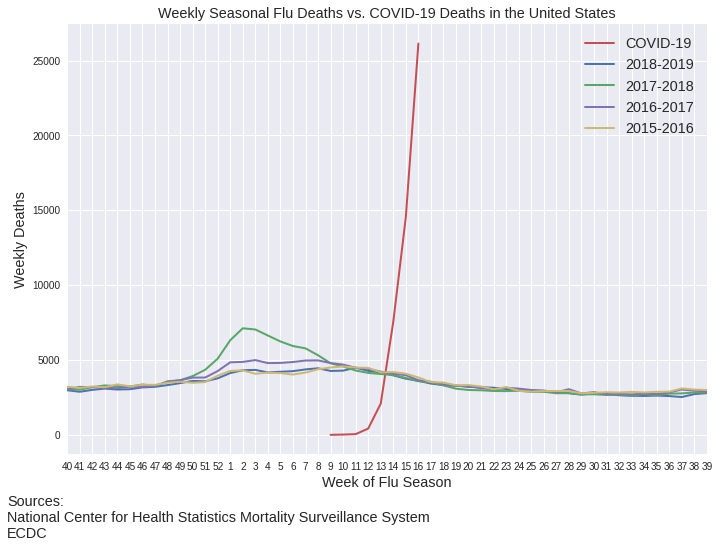

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(21,29,1), deaths_covid, linewidth=2, color='C2', label='COVID-19')
ax.plot(np.arange(52),data_season_2018_2019['NUM INFLUENZA DEATHS']+data_season_2018_2019['NUM PNEUMONIA DEATHS'], linewidth=2, color='C0', label='2018-2019')
ax.plot(np.arange(52),data_season_2017_2018['NUM INFLUENZA DEATHS']+data_season_2017_2018['NUM PNEUMONIA DEATHS'], linewidth=2, color='C1', label='2017-2018')
ax.plot(np.arange(52),data_season_2016_2017['NUM INFLUENZA DEATHS']+data_season_2016_2017['NUM PNEUMONIA DEATHS'], linewidth=2, color='C3', label='2016-2017')
ax.plot(np.arange(52),data_season_2015_2016['NUM INFLUENZA DEATHS']+data_season_2015_2016['NUM PNEUMONIA DEATHS'], linewidth=2, color='C4', label='2015-2016')

ax.set_xticks([i for i in np.arange(0,53)])
ax.set_xticklabels([i for i in np.arange(40,53)]+[i for i in np.arange(1,40)])
ax.set_title('Weekly Seasonal Flu Deaths vs. COVID-19 Deaths in the United States', fontsize='x-large')
ax.set_xlabel('Week of Flu Season', fontsize='x-large')
ax.set_ylabel('Weekly Deaths', fontsize='x-large')
ax.legend(fontsize='x-large')
plt.xlim(0,51)
fig.tight_layout()
plt.annotate('Sources:\nNational Center for Health Statistics Mortality Surveillance System\nECDC', (0,0), (-60,-40), fontsize='x-large', xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('2020-04-13-COVID-19-vs-Flu.png', bbox_inches='tight', format='png', dvi=1200)

In [0]:
from google.colab import files
files.download("2020-04-13-COVID-19-vs-Flu.png")